In [10]:
!pip install keras_ocr

     |████████████████████████████████| 41 kB 353 kB/s 
     |████████████████████████████████| 890 kB 40.7 MB/s 
     |████████████████████████████████| 603 kB 52.2 MB/s 
     |████████████████████████████████| 9.5 MB 33.2 MB/s 
     |████████████████████████████████| 50 kB 6.0 MB/s 


Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


TypeError: ignored

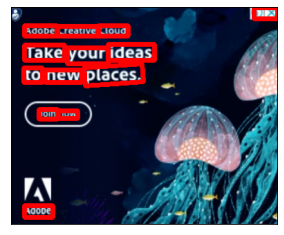

In [33]:

import matplotlib.pyplot as plt
import keras_ocr
pipeline = keras_ocr.pipeline.Pipeline()
#read image from the an image path (a jpg/png file or an image url)
img = keras_ocr.tools.read('/content/sample.jpg')
# Prediction_groups is a list of (word, box) tuples
prediction_groups = pipeline.recognize([img])
#print image with annotation and boxes
keras_ocr.tools.drawAnnotations(image=img, predictions=prediction_groups[0])

In [29]:
import math
import numpy as np
def midpoint(x1, y1, x2, y2):
    x_mid = int((x1 + x2)/2)
    y_mid = int((y1 + y2)/2)
    return (x_mid, y_mid)
#example of a line mask for the word "Tuesday"
box = prediction_groups[0][10]
x0, y0 = box[1][0]
x1, y1 = box[1][1] 
x2, y2 = box[1][2]
x3, y3 = box[1][3] 
        
x_mid0, y_mid0 = midpoint(x1, y1, x2, y2)
x_mid1, y_mi1 = midpoint(x0, y0, x3, y3)
thickness = int(math.sqrt( (x2 - x1)**2 + (y2 - y1)**2 ))

In [30]:
mask = np.zeros(img.shape[:2], dtype="uint8")
cv2.line(mask, (x_mid0, y_mid0), (x_mid1, y_mi1), 255, thickness)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)